In [ ]:
%cd /content/drive/MyDrive/빅기분 과제/DAGMM

/content/drive/MyDrive/빅분기 과제/DAGMM


In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from dagmm import DAGMM

TensorFlow 1.x selected.


In [ ]:
data1, _ = make_blobs(n_samples=1000, n_features=3, centers=4, random_state=123)
data2, _ = make_blobs(n_samples=30, n_features=3, centers=2, cluster_std= 2, random_state=120)

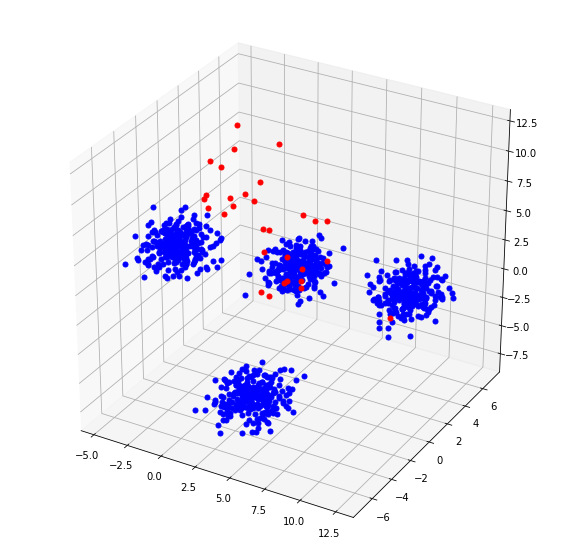

In [ ]:
f = plt.figure(figsize=[10,10])
ax = plt.axes(projection = '3d')
ax.plot(data1[:,0], data1[:,1], data1[:,2], 'o', c='b', markersize=5)
ax.plot(data2[:,0], data2[:,1], data2[:,2], 'o', c="r", markersize=5)

In [ ]:
data3 = np.r_[data1, data2]

In [ ]:
tf.reset_default_graph()

In [ ]:
model_dagmm = DAGMM(
    comp_hiddens=[32,16,1], comp_activation=tf.nn.tanh,
    est_hiddens=[16,4], est_activation=tf.nn.tanh, est_dropout_ratio=0.25,
    epoch_size=3000, minibatch_size=128
)

In [ ]:
model_dagmm.fit(data3)




Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.dropout instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



 epoch 100/3000 : loss = 1.634
 epoch 200/3000 : loss = 1.396
 epoch 300/3000 : loss = 1.289
 epoch 400/3000 : loss = 1.016
 epoch 500/3000 : loss = 0.715
 epoch 600/3000 : loss = 0.533
 epoch 700/3000 : loss = 0.457
 epoch 800/3000 : loss = 0.415
 epoch 900/3000 : loss = 0.378
 epoch 1000/3000 : loss = 0.348
 epoch 1100/3000 : loss = 0.3

In [ ]:
energy = model_dagmm.predict(data3)

Text(0, 0.5, 'Number of Sample(s)')

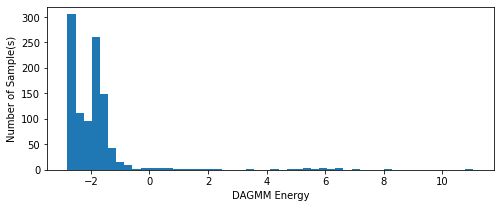

In [ ]:
plt.figure(figsize=[8,3])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")

In [ ]:
ano_index = np.arange(len(energy))[energy > np.percentile(energy, 95)]

In [ ]:
ano_index

array([   0,   51,   55,  112,  297,  321,  332,  333,  382,  508,  514,
        535,  543,  544,  563,  564,  586,  636,  661,  724,  776,  825,
        877,  903,  941,  955,  990, 1000, 1002, 1003, 1005, 1006, 1007,
       1008, 1009, 1010, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1020,
       1021, 1022, 1023, 1024, 1025, 1026, 1027, 1029])

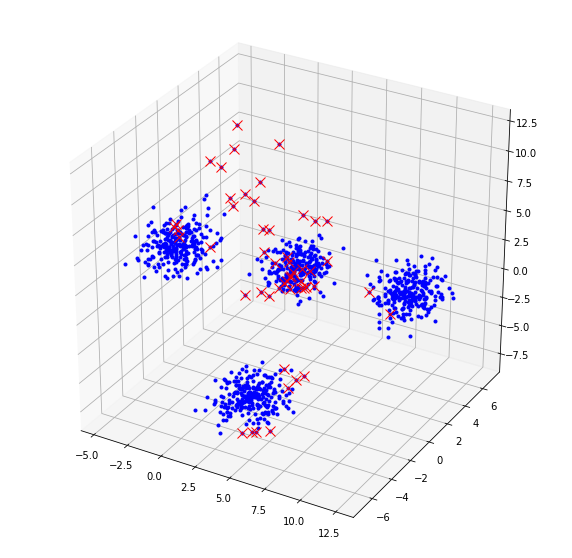

In [ ]:
f = plt.figure(figsize=[10,10])
ax = plt.axes(projection = '3d')
ax.plot(data3[:,0], data3[:,1], data3[:,2], 'o', c='b', markersize=3)
ax.plot(data3[ano_index, 0], data3[ano_index, 1], data3[ano_index, 2], 'x', c="r", markersize=10)

In [ ]:
from sklearn.mixture import GaussianMixture
from numpy import quantile, where, random

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=0).fit(data3)

In [ ]:
scores = gmm.score_samples(data3)

In [ ]:
thresh = quantile(scores, .05)
print(thresh)

-8.353469945574005


In [ ]:
index = where(scores <= thresh)
values = data3[index]

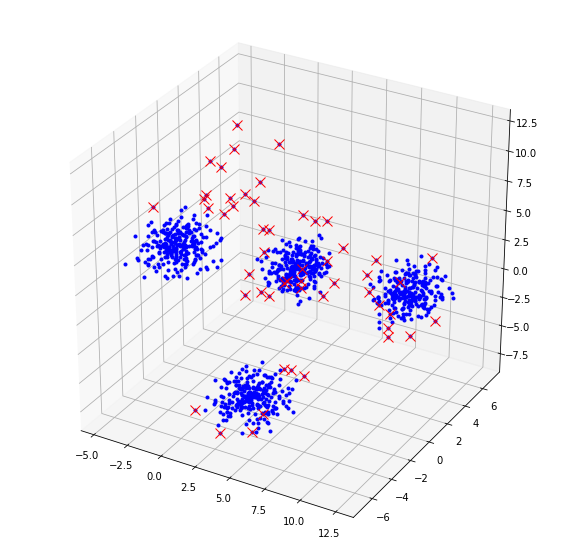

In [ ]:
f = plt.figure(figsize=[10,10])
ax = plt.axes(projection = '3d')
ax.plot(data3[:,0], data3[:,1], data3[:,2], 'o', c='b', markersize=3)
ax.plot(values[:, 0], values[:, 1], values[:, 2], 'x', c="r", markersize=10)